<a href="https://colab.research.google.com/github/sete50/navaraj/blob/main/statistical_model_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("matlib")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rgl’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(matlib)
library(ggplot2)


In [ ]:
#  Import and display input variables
x = as.matrix(read.csv("/content/dataset.csv", header= TRUE ))
head(x)



V1,V2,V3,V4,V5
x1,x3,x4,x5,x2
8.34,40.77,"1,010.84",90.01,480.48
23.64,58.49,"1,011.4",74.2,445.75
29.74,56.9,"1,007.15",41.91,438.76
19.07,49.69,"1,007.22",76.79,453.09
11.8,40.66,"1,017.13",97.2,464.43


In [ ]:
X= x[, -ncol(x)]
head(X)


V1,V2,V3,V4
x1,x3,x4,x5
8.34,40.77,"1,010.84",90.01
23.64,58.49,"1,011.4",74.2
29.74,56.9,"1,007.15",41.91
19.07,49.69,"1,007.22",76.79
11.8,40.66,"1,017.13",97.2


In [ ]:
dim(X)

[1] 9569    4

In [ ]:
Y= x[, ncol(x)]
Y= as.matrix(Y)
Y= Y[,1,drop= FALSE]
colnames(Y)= c("y")
head(Y)

y
480.48
445.75
438.76
453.09
464.43
470.96


In [ ]:
dim(x)

[1] 9568    5

In [ ]:
dim(X)

[1] 9568    4

In [ ]:
# Adding time dimension
time= data.frame(Numbers=1:9568)
tail(time)

,Numbers
,<int>
9563,9563
9564,9564
9565,9565
9566,9566
9567,9567
9568,9568


X1,X,X.1,X.2,X.3
2,NA,NA,NA,NA
3,NA,NA,NA,NA
4,NA,NA,NA,NA
5,NA,NA,NA,NA
6,NA,NA,NA,NA
7,NA,NA,NA,NA


In [ ]:
write.csv(time, file = "time_data.csv", row.names = FALSE)
times<- data.frame(x1 = 1:nrow(X))
colnames(times)= c("time")
head(times)


,time
,<int>
1,1
2,2
3,3
4,4
5,5
6,6


In [ ]:
# plot time series data
X.ts= ts(X,start= c(min(times),max(times)), frequency = 1)
Y.ts= ts(Y,start= c(min(times),max(times)), frequency = 1)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y):
“NAs introduced by coercion”


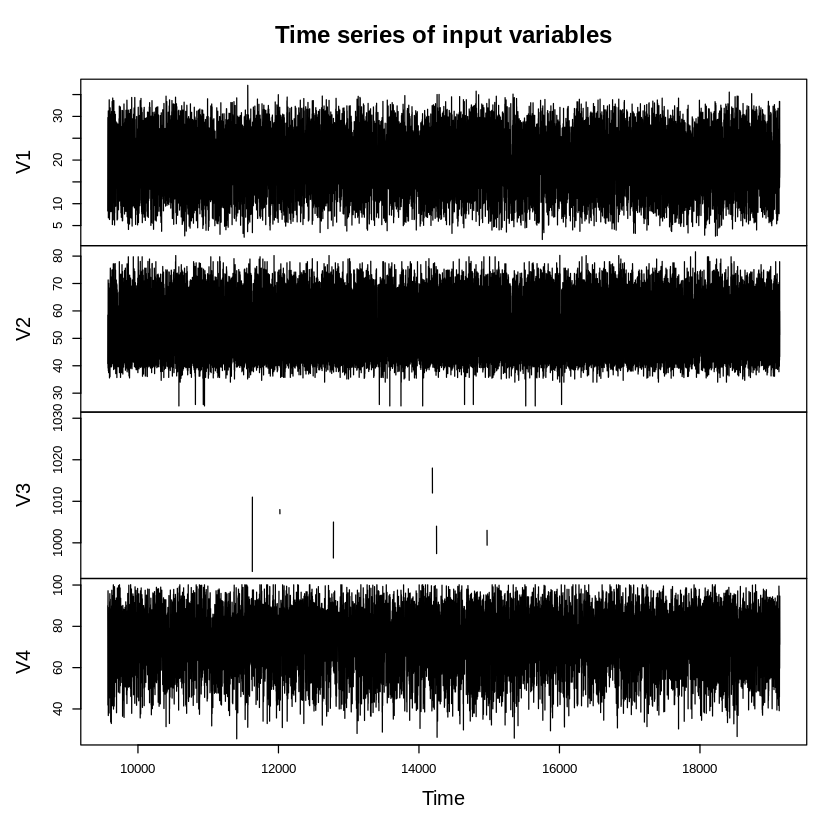

In [ ]:
# plot time series of input variables
plot(X.ts, main= "Time series of input variables", xlab= "Time", ylab= "inputs")

In [ ]:
print(colnames(X))

[1] "x1" "x3" "x4" "x5"


Warning message in xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log, :
“NAs introduced by coercion”
Warning message in xy.coords(x, y):
“NAs introduced by coercion”


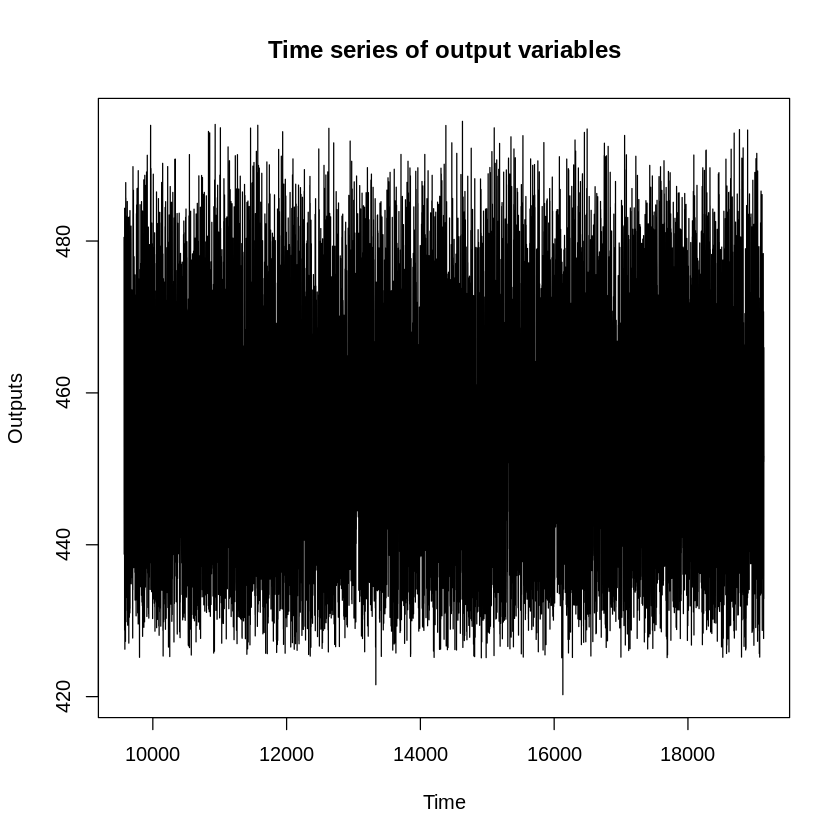

In [ ]:
# plotting y series
plot(Y.ts, main= "Time series of output variables", xlab= "Time", ylab= "Outputs")

In [ ]:
# Density plots of input variable (X)
density_X= density(X)
plot(density_X, main="Density plot of input variables")

In [ ]:
# Histogram of input Variable(X)
hist(X, freq= FALSE,main= "Histogram of input variable")

In [ ]:
# combining Density plot and histogram
hist(X,freq = FALSE,main = "Density")
lines(density_of_X,lwd=2,col="blue")
rug(jitter(X))

In [ ]:
# Density plot of input "x1"
density_X1=density(X[,"x1"])
hist(X[,"x1"],freq = FALSE,main = "Histogram and density plot of x1",xlab = "x1 input")
lines(density_X1,lwd=2,col="blue")
rug(jitter(X[,"x1"]))

In [ ]:
# Density plot of input "x3"
density_X3=density(X[,"x3"])
hist(X[,"x3"],freq = FALSE,main = "Histogram and density plot of x3",xlab = "x3 input")
lines(density_X3,lwd=2,col="blue")
rug(jitter(X[,"x3"]))

In [ ]:
# Density plot of input"x4"
density_X4=density(X[,"x4"])
hist(X[,"x4"],freq = FALSE,main = "Histogram and density plot of x4",xlab = "x4 input")
lines(density_X4,lwd=2,col="blue")
rug(jitter(X[,"x4"]))

In [ ]:
# Density plot of input"x5"
density_X5=density(X[,"x5"])
hist(X[,"x5"],freq = FALSE,main = "Histogram and density plot of x5",xlab = "x5 input")
lines(density_X5,lwd=2,col="blue")
rug(jitter(X[,"x5"]))

In [ ]:
# Density plot of output"Y"
density_y=density(Y[,"y"])
hist(Y[,"y"],freq = FALSE,main = "Histogram and density plot of y",xlab = "output y")
lines(density_y,lwd=2,col="brown")
rug(jitter(Y[,"y"]))

ERROR: Error in density.default(Y[, "y"]): argument 'x' must be numeric


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


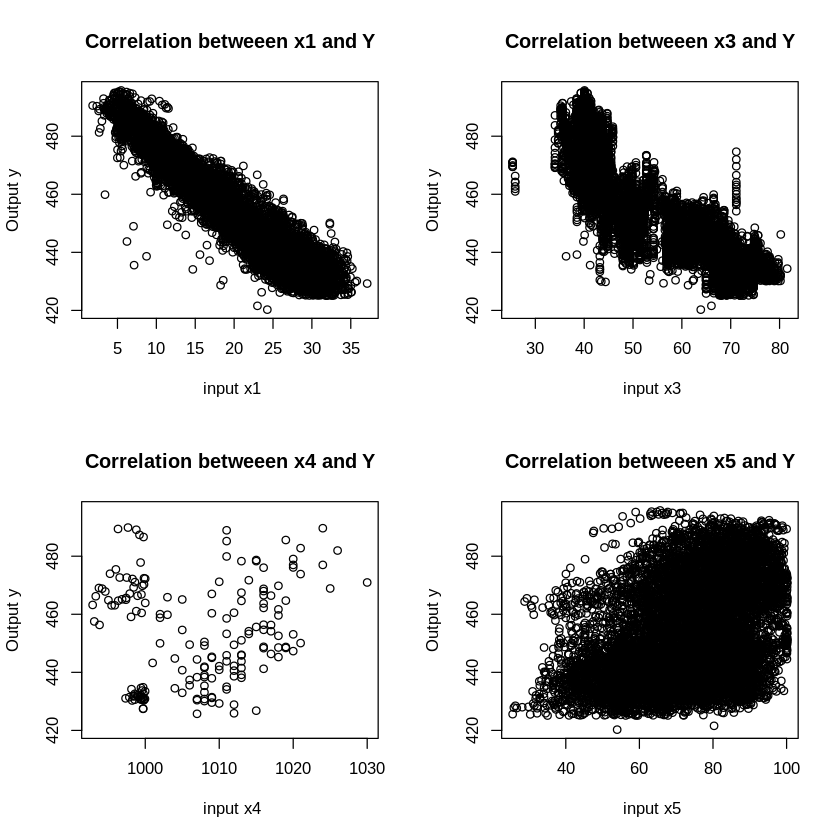

In [ ]:
# Scatter plots of input variables and output variable
#display in 2/2 rows
par(mfrow=c(2,2))
# Scatter plot of x1 & y
plot(X[,"x1"],Y,main = "Correlation betweeen x1 and Y", xlab = " input x1", ylab = "Output y")
#scatter plot of x3 & y
plot(X[,"x3"],Y,main = "Correlation betweeen x3 and Y", xlab = " input x3", ylab = "Output y")
#scatter plot of x4 & y
plot(X[,"x4"],Y,main = "Correlation betweeen x4 and Y", xlab = " input x4", ylab = "Output y")
#scatter plot of x5 & y
plot(X[,"x5"],Y,main = "Correlation betweeen x5 and Y", xlab = " input x5", ylab = "Output y")



# Task 2: Regression Analysis

In [ ]:
# binding data from given model 1
X_model1= cbind(1, X[, "x4"], (X[,"x3"])^2)
X_model1

In [ ]:
# calculate model1_thetahat
model1_thetahat = solve(t(X_model1) %*% X_model1) %*% t(X_model1)%*%Y
model1_thetahat

ERROR: Error in t(X_model1) %*% X_model1: requires numeric/complex matrix/vector arguments


In [ ]:
# binding data from given model 2
X_model2= cbind(1, X[,"x4"], X[,"x3"]^2, X[,"x5"])
X_model2

In [ ]:
# calculate model2_thetahat
model2_thetahat = solve(t(X_model2) %*% X_model2) %*% t(X_model2)%*%Y
model2_thetahat

In [ ]:
# binding data from given model 3
X_model3= cbind(1, X[,"x3"], X[,"x4"]^2, X[,"x5"]^3)
X_model3

In [ ]:
# calculate model3_thetahat
model3_thetahat = solve(t(X_model3) %*% X_model3) %*% t(X_model3)%*%Y
model3_thetahat

In [ ]:
# binding data from given model 4
X_model4= cbind(1, X[,"x4"], X[,"x3"]^2, X[,"x5"]^3)
X_model4


ERROR: Error in X[, "x3"]^2: non-numeric argument to binary operator


In [ ]:
# calculate model4_thetahat
model4_thetahat = solve(t(X_model4) %*% X_model4) %*% t(X_model4)%*%Y
model4_thetahat

In [ ]:
# binding data from given model 5
X[,"x1"] <- as.numeric(as.character(X[,"x1"]))
X_model5= cbind(1, X[,"x4"], X[,"x1"]^2, X[,"x3"]^2)
X_model5


In [ ]:
# calculate model5_thetahat
model5_thetahat = solve(t(X_model5) %*% X_model5) %*% t(X_model5)%*%Y
model5_thetahat

In [ ]:
# Print the value of thetahat & transpose it
model1_thetahat
t(model1_thetahat)

model2_thetahat
t(model2_thetahat)

model3_thetahat
t(model3_thetahat)

model4_thetahat
t(model4_thetahat)

model5_thetahat
t(model5_thetahat)

Calculation of Y-hat and RSS

In [ ]:
# Calculate Y-hat for model_1
Y_hat_model1 = X_model1 %*% model1_thetahat
head(Y-hat_model1)

In [ ]:
# Calculate RSS for model1
RSS_model1=sum((Y-Y_hat_model1)^2)
head(RSS_model1)

In [ ]:
# Calculate Y-hat for model2
Y_hat_model2 = X_model2 %*% model2_thetahat
head(Y-hat_model2)


In [ ]:
# Calculate RSS for model2
RSS_model2=sum((Y-Y_hat_model2)^2)
head(RSS_model2)

In [ ]:
# Calculate Y-hat model3
Y_hat_model3 = X_model3 %*% model3_thetahat
head(Y-hat_model3)


In [ ]:
# Calculate RSS for model3
RSS_model3=sum((Y-Y_hat_model3)^2)
head(RSS_model3)

In [ ]:
# Calculate Y-hat for model4
Y_hat_model4 = X_model4 %*% model4_thetahat
head(Y-hat_model4)

In [ ]:
# Calculate RSS for model4
RSS_model4=sum((Y-Y_hat_model4)^2)
head(RSS_model4)

In [ ]:
# Calculate Y-hat for model5
Y_hat_model5 = X_model5 %*% model5_thetahat
head(Y-hat_model5)

In [ ]:
# Calculate RSS for model5
RSS_model5=sum((Y-Y_hat_model5)^2)
head(RSS_model5)

In [ ]:
# Print RSS values
model1= c(RSS_model1)
model2= c(RSS_model2)
model3= c(RSS_model3)
model4= c(RSS_model4)
model5= c(RSS_model5)
# convering into dataframe
dfRSS= data.frame(model1, model2, model3, model4, model5)
dfRSS

Calculating Variance and likelihood

In [ ]:
# calculating variance of model1 and display few rows
N= length(Y)
variance_model1= RSS_model1/(N-1)
variance_model1

In [ ]:
# calculating the log-likelihood of model1
likelihood_model1= -(N/2)*(log(2*pi))-(N/2)*(log(variance_model1))-(1/(2*variance_model1))*RSS-model1
likelihood_model1

In [ ]:
# calculating variance of model2 and display few rows
N= length(Y)
variance_model2= RSS_model2/(N-1)
variance_model2

In [ ]:
# calculating the log-likelihood of model2
likelihood_model2= -(N/2)*(log(2*pi))-(N/2)*(log(variance_model2))-(1/(2*variance_model2))*RSS-model2
likelihood_model2

In [ ]:
# calculating variance of model3 and display few rows
N= length(Y)
variance_model3= RSS_model3/(N-1)
variance_model3

In [ ]:
# calculating the log-likelihood of model2
likelihood_model3= -(N/2)*(log(2*pi))-(N/2)*(log(variance_model3))-(1/(2*variance_model3))*RSS-model3
likelihood_model3

In [ ]:
# calculating variance of model4 and display few rows
N= length(Y)
variance_model4= RSS_model4/(N-1)
variance_model4

In [ ]:
# calculating the log-likelihood of model4
likelihood_model4= -(N/2)*(log(2*pi))-(N/2)*(log(variance_model4))-(1/(2*variance_model4))*RSS-model4
likelihood_model4

In [ ]:
# calculating variance of model5 and display few rows
N= length(Y)
variance_model5= RSS_model5/(N-1)
variance_model5

In [ ]:
# calculating the log-likelihood of model5
likelihood_model5= -(N/2)*(log(2*pi))-(N/2)*(log(variance_model5))-(1/(2*variance_model5))*RSS-model5
likelihood_model5

In [ ]:
# print variance values
model1= c(variance_model1)
model2= c(variance_model2)
model3= c(variance_model3)
model4= c(variance_model4)
model5= c(variance_model5)
# displaying the values in data frame
dfvariance= data.frame(model1, model2, model3, model4, model5)
dfvariance

In [ ]:
# print likelihood values for each model
model1= c(likelihood_model1)
model2= c(likelihood_model2)
model3= c(likelihood_model3)
model4= c(likelihood_model4)
model5= c(likelihood_model5)
# Display likelihood values in a dataframe
dflikelihood= data.frame(model1, model2, model3, model4, model5)
dflikelihood

Calculating AIC and BIC of models

In [ ]:
# Independent variables in model1
K_model1= length(model1_thetahat)
K_model1

In [ ]:
# AIC of model1
AIC_model1= 2*K_model1-2*likelihood_model1
AIC_model1

In [ ]:
#BIC of model1
BIC_model1= K_model1*log(N)-2*likelihood_model1
BIC_model1

In [ ]:
# Independent variables in model2
K_model2= length(model2_thetahat)
K_model2

In [ ]:
# AIC of model2
AIC_model2= 2*K_model2-2*likelihood_model2
AIC_model2

In [ ]:
#BIC of model2
BIC_model2= K_model2*log(N)-2*likelihood_model2
BIC_model2

In [ ]:
# Independent variables in model3
K_model3= length(model3_thetahat)
K_model3

In [ ]:
# AIC of model3
AIC_model3= 2*K_model3-2*likelihood_model3
AIC_model3

In [ ]:
#BIC of model3
BIC_model3= K_model3*log(N)-2*likelihood_model3
BIC_model3

In [ ]:
# Independent variables in model4
K_model4= length(model4_thetahat)
K_model4

In [ ]:
# AIC of model4
AIC_model4= 2*K_model4-2*likelihood_model4
AIC_model4

In [ ]:
#BIC of model4
BIC_model4= K_model4*log(N)-2*likelihood_model4
BIC_model4

In [ ]:
# Independent variables in model5
K_model5= length(model5_thetahat)
K_model5

In [ ]:
# AIC of model5
AIC_model5= 2*K_model5-2*likelihood_model5
AIC_model5

In [ ]:
#BIC of model5
BIC_model5= K_model5*log(N)-2*likelihood_model5
BIC_model5

In [ ]:
# printing K_values
model1= c(K_model1)
model2= c(K_model2)
model3= c(K_model3)
model4= c(K_model4)
model5= c(K_model5)
# Displaying K values in Dataframe
dfK= data.frame(model1, model2, model3, model4, model5)
dfK

In [ ]:
# Printing AIC values
model1= c(AIC_model1)
model2= c(AIC_model2)
model3= c(AIC_model3)
model4= c(AIC_model4)
model5= c(AIC_model5)
# Displaying K values in Dataframe
dfAIC= data.frame(model1, model2, model3, model4, model5)
dfAIC

In [ ]:
# Printing BIC values
model1= c(BIC_model1)
model2= c(BIC_model2)
model3= c(BIC_model3)
model4= c(BIC_model4)
model5= c(BIC_model5)
# Displaying K values in Dataframe
dfBIC= data.frame(model1, model2, model3, model4, model5)
dfBIC

Calculating Errors and Gaussian Distribution plots

In [ ]:
par(mfrow= c(1,1))
# Error of model1
model1_error= Y-Y_hat_model1
head(model1_error)

In [ ]:
#Plotting the graph QQplot and QQ line of model1
qqnorm(model1_error, col= "blue", main= "QQ plot of model1")
qqline(model1_error, col= "brown", lwd= 1)

In [ ]:
# Error of model2
model2_error= Y-Y_hat_model2
head(model2_error)

In [ ]:
Plotting the graph QQplot and QQ line of model2
qqnorm(model2_error, col= "blue", main= "QQ plot of model2")
qqline(model2_error, col= "brown", lwd= 1)

In [ ]:
# Error of model3
model3_error= Y-Y_hat_model3
head(model3_error)

In [ ]:
Plotting the graph QQplot and QQ line of model3
qqnorm(model3_error, col= "blue", main= "QQ plot of model3")
qqline(model3_error, col= "brown", lwd= 1)

In [ ]:
# Error of model4
model4_error= Y-Y_hat_model4
head(model4_error)

In [ ]:
Plotting the graph QQplot and QQ line of model4
qqnorm(model4_error, col= "blue", main= "QQ plot of model4")
qqline(model4_error, col= "brown", lwd= 1)

In [ ]:
# Error of model5
model5_error= Y-Y_hat_model5
head(model5_error)

In [ ]:
Plotting the graph QQplot and QQ line of model5
qqnorm(model5_error, col= "blue", main= "QQ plot of model5")
qqline(model5_error, col= "brown", lwd= 1)

Splitting Data into Training and Testing and Calculating estimation based on training data

In [ ]:
# Spliting the dataset y into  Training and Testing dataset
split_Y<- initial_split(data = as.data.frame(Y), prop=.7)
# Training splitted dataset Y
Y_training_set= training(split_Y)
# Testing splitted dataset Y
Y_testing_set= as.matrix(testing(split_Y))
Y_training_data= as.matrix(Y_training_set)

# Spliting the dataset of X in Training and testing dataset
split_X<-initial_split(data = as.data.frame(X),prop=.7)
# Training splitted dataset X
X_training_set= training(split_X)
# Testing splitted dataset X
X_testing_set= as.matrix(testing(split_X))
X_testing_data= as.matrix(X_testing_set)
X_training_data= as.matrix(X_training_set)

# Estimating model parameters using Training set
traning_ones= matrix(1, length(X_training_set$x1),1)
#  Using selected  model 5
X_training_model<= cbind(training_ones,X_training_set[,"x4"],(X_training_set[,"x1"])^2,(X_training_set[,"x3"])^2)
training_thetahat= Ginv(t(X_training_model) %*% X_training_model) %*% t(X_training_model) %*%  Y_training_data

# ModelPrediction
Y_testing_hat = X_testing_data %*% training_thetahat
head(Y_testing_hat)


In [ ]:
# RSS for Y_testing
RSS_testing= sum(Y_testing_set-Y_testing_hat)^2)
RSS_testing

In [ ]:
# t test for training set
t.test(Y_training_data, mu=500, alternative="two.sided", conf.level=0.95)

In [ ]:
# plotting training data with new CI
C_I1=454.0137
C_I2=454.8377
p2 = plot(density(Y_training_data), col="blue", lwd=2,
           main="Distribution of Traning Data")
abline(v=C_I1,col="brown", lty=2)
abline(v=C_I2,col="brown", lty=2)

In [ ]:
# Thetahat for training set
thetahat_training =solve(t(X_training_data) %*% X_training_data) %*% t(X_training_data) %*%Y_training_data
head(thetahat_training)
length(thetahat_training)

In [ ]:
# Density plot of training dataset
density_test=density(Y_training_data)
plot((density_test))

In [ ]:
## Calculating Confidential interval
z=1.96
# 95% Confidential interval
# error=((Y_testing_set-Y_testing_hat))
# n_len=length(Y_testing_hat)
# C_I_1= z * sqrt( (error * (1-error) ) / n_len)
# C_I_2= z * sqrt( (error * (1+error)) / n_len)

Variance_model = mean((Y_testing_set - Y_testing_hat)^2)
se = sqrt(Variance_model)
CI_lower = Y_testing_hat - z * se
CI_upper = Y_testing_hat + z * se
head(CI_lower)
head(CI_upper)